**SUMMARY OF PROBLEM STATEMENT:**
   Pneumonia is an infection in one or both lungs. The diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lungcancer, or post-radiation or surgical changes.Comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. 
  In addition, clinicians are faced with reading high volumes of images every shift. So automating Pneumonia screening in chest radiographs, and providing affected area details through bounding box will assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare.

In [1]:
#Upgrading the kaggle version
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=261ce2d905037df48b2bede5db94aca689cb715f6f166892e60687d047b13a5d
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [2]:
#Loading the rsna-pneumonia-detection-challenge dataset
import os
os.environ['KAGGLE_USERNAME'] = "shreek" # username from the json file
os.environ['KAGGLE_KEY'] = "2fcd841dfedbc878a12d5c32bb7f4e6c" # key from the json file
!kaggle competitions download --force -c rsna-pneumonia-detection-challenge

 99% 3.63G/3.66G [00:57<00:00, 47.5MB/s]
100% 3.66G/3.66G [00:57<00:00, 67.9MB/s]


In [3]:
#Installing pydicom library
!pip3 install -q pydicom         

     |████████████████████████████████| 35.5MB 126kB/s 


In [4]:
#Extracting the dataset files
path_to_zip_file='/content/rsna-pneumonia-detection-challenge.zip'
directory_to_extract_to='/content/rsna-pneumonia-detection-challenge'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
#Loading train images
TRAIN_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_train_images'

In [6]:
#The train and test pathnames are retrieved and stored in array format
import glob
train_images=glob.glob(TRAIN_DIR + '/*.dcm')

In [7]:
#Loading the labels dataset
import pandas as pd
train_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
detail=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')

In [8]:
trainData=pd.merge(train_lbls,detail,on='patientId')

In [9]:
import pydicom
patientId_data=[]
Age=[]
patientSex=[]

for i in range(len(train_images)):
  ds = pydicom.read_file(train_images[i]) 
  Id=ds.PatientID
  age=ds.PatientAge
  patient_sex=ds.PatientSex
  modality=ds.Modality
  patientId_data.append(Id)
  Age.append(age)
  patientSex.append(patient_sex)


In [10]:
dict={'patientId':patientId_data,'Age':Age,'patientSex':patientSex}
train_Data=pd.DataFrame(dict)

In [11]:
train_data=pd.merge(trainData,train_Data,on='patientId')

**VISUALIZING THE DATA**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Age distribution over pneumonia affected patients')

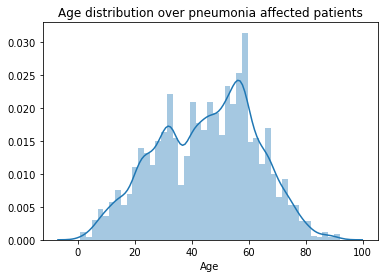

In [12]:
filter=train_Data.apply(lambda x:x['Target']==1,axis=1)
tar_lbls=train_data[filter]
import seaborn as sns

plot=sns.distplot(tar_lbls['Age'])
plot.set_title("Age distribution over pneumonia affected patients")

From the graph we infer the below mentioned points:
1.Probabilty of patients being diagonised for pneumonia is high for the age range between **50-60**.
2.Second highest probabilty of the pneumonia affected patients is of age range **30**.


Text(0, 0.5, 'Number of Occurrences')

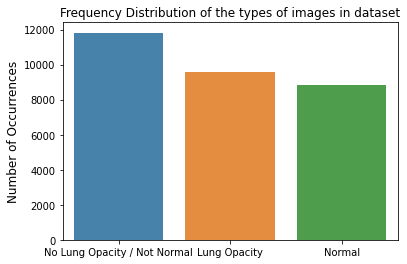

In [38]:
import matplotlib.pyplot as plt
tr_Data=train_data.drop_duplicates()
class_count=tr_Data['class'].value_counts()
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of the types of images in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)

The distribution of the records if different classes can be infered from the graph.It shows that 
1.Nearly 32% of the records shows **Lung Opacity**.
2.40% of the records shows **No Lung Opacity**
3.30% of the records shows **Normal lungs**.

Text(0, 0.5, 'Number of Occurrences')

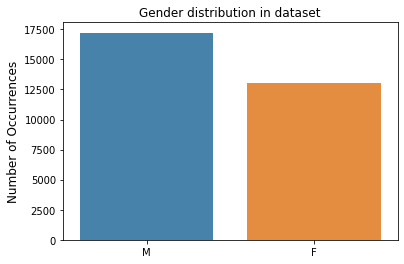

In [39]:
gender_count=tr_Data['patientSex'].value_counts()
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Gender distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


Out of 30227 records we see that 17216 are male and 13011 are female.
Hence in the dataset **56.95%** records are of male patients and **43.04%** records are of female patients.

Text(0, 0.5, 'Number of Occurrences')

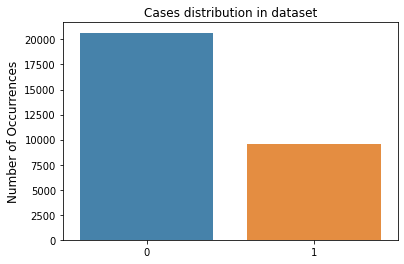

In [40]:
Positive_count=tr_Data['Target'].value_counts()
sns.barplot(Positive_count.index, Positive_count.values, alpha=0.9)
plt.title('Cases distribution in dataset')
plt.ylabel('Number of Occurrences', fontsize=12)


Nearly **66%** of records shows pneumonia affected images.**34**% of records shows negative cases.

**DATA PREPROCESSING**

In [16]:
#Converting the dcm images to array 
import pydicom
img_data=[]
for i in range(2000):
  ds = pydicom.read_file(train_images[i]) 
  img=ds.pixel_array
  img_data.append(img)

In [17]:
#Creating a array of patient ID's
ID=[]
for i in range(2000):
  ds = pydicom.read_file(train_images[i]) 
  id=ds.PatientID
  ID.append(id)

In [18]:
dict={'patientId':ID,'Image':img_data}
image_df=pd.DataFrame(dict)

In [19]:
Data=pd.merge(train_data,image_df,on='patientId')
Data.head()

,patientId,x,y,width,height,Target,class,Age,patientSex,Image
0,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,48,F,"[[31, 24, 19, 14, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0..."
1,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,75,M,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
2,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity,75,M,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
3,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity,75,M,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
4,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity,75,M,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."


In [20]:
x=Data[['patientId','Image']]
x.head()

,patientId,Image
0,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,"[[31, 24, 19, 14, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0..."
1,00704310-78a8-4b38-8475-49f4573b2dbb,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
2,00704310-78a8-4b38-8475-49f4573b2dbb,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
3,00704310-78a8-4b38-8475-49f4573b2dbb,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."
4,00704310-78a8-4b38-8475-49f4573b2dbb,"[[60, 49, 39, 31, 22, 17, 13, 9, 5, 4, 3, 2, 1..."


In [21]:
import numpy as np

dict={'id':Data['patientId'],'x':Data['x'],'y':Data['y'],'width':Data['width'],'height':Data['height']}
y=pd.DataFrame(dict)
y['x'].replace(np.nan,0,inplace=True)
y['y'].replace(np.nan,0,inplace=True)
y['width'].replace(np.nan,0,inplace=True)
y['height'].replace(np.nan,0,inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,test_size=0.4,random_state=123)

In [23]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (1705, 2)
Shape of y_train (1705, 5)
Shape of x_test (1138, 2)
Shape of y_test (1138, 5)


In [24]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

X_train = np.zeros((x_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH,3))
for index in range(x_train.shape[0]):
    img = x_train.iloc[index][1]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))

In [25]:
X_train.shape

(1705, 224, 224, 3)

In [26]:
masks = np.zeros((y_train.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH))
for i in range(y_train.shape[0]):
  x1 = int(y_train.iloc[i]['x']*224/1024)
  x2 = int(y_train.iloc[i]['width']*224/1024 + x1)
  y1 = int(y_train.iloc[i]['y']*224/1024)
  y2 = int(y_train.iloc[i]['height']*224/1024 + y1)

  masks[i][y1:y2,x1:x2]=1


In [27]:
X_test = np.zeros((x_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH,3))
for index in range(x_test.shape[0]):
    img = x_test.iloc[index][1]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    X_test[index] = preprocess_input(np.array(img, dtype=np.float32))

In [28]:
X_test.shape

(1138, 224, 224, 3)

In [29]:
masks_test = np.zeros((y_test.shape[0], IMAGE_HEIGHT, IMAGE_WIDTH))
for i in range(y_test.shape[0]):
  x1 = int(y_test.iloc[i]['x']*224/1024)
  x2 = int(y_test.iloc[i]['width']*224/1024 + x1)
  y1 = int(y_test.iloc[i]['y']*224/1024)
  y2 = int(y_test.iloc[i]['height']*224/1024 + y1)

  masks_test[i][y1:y2,x1:x2]=1


In [30]:
masks_test.shape

(1138, 224, 224)

**MODEL BUILDING**

In [31]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

ALPHA=1
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)
    x = UpSampling2D()(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((224, 224))(x)

    return Model(inputs=model.input, outputs=x)

In [32]:
model = create_model(False)
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________

ACCURACY METRICS

In [33]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [34]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient,'accuracy'])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [37]:
import tensorflow
model.fit(X_train, masks, validation_data = (X_test,masks_test), epochs=5, batch_size=16, verbose=1,callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/5
107/107 [==============================] - ETA: 0s - loss: 3.1044 - dice_coefficient: 0.0741 - accuracy: 0.0924
Epoch 00001: loss improved from inf to 3.10439, saving model to model-3.10.h5
107/107 [==============================] - 758s 7s/step - loss: 3.1044 - dice_coefficient: 0.0741 - accuracy: 0.0924 - val_loss: 2.7080 - val_dice_coefficient: 0.0888 - val_accuracy: 0.0434
Epoch 2/5
107/107 [==============================] - ETA: 0s - loss: 2.3222 - dice_coefficient: 0.1257 - accuracy: 0.0254
Epoch 00002: loss improved from 3.10439 to 2.32222, saving model to model-2.32.h5
107/107 [==============================] - 694s 6s/step - loss: 2.3222 - dice_coefficient: 0.1257 - accuracy: 0.0254 - val_loss: 2.2433 - val_dice_coefficient: 0.1339 - val_accuracy: 0.0146
Epoch 3/5
107/107 [==============================] - ETA: 0s - loss: 2.0352 - dice_coefficient: 0.1648 - accuracy: 0.0106
Epoch 00003: loss improved from 2.32222 to 2.03524, saving model to model-2.04.h5
107/107 [===